<h1 style="font-size:250%; font-family:cursive; "><b>Calculus for Machine Learning using SymPy- Detailed Video in my YouTube Channel</b><a id="0"></a></h1>


<a href="https://youtu.be/FCscOS32Jec"><h1 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>Link to this Video Tutorial</b></h1></a>

# Differentiating and integrating symbolically using SymPy

In [1]:
import sympy

x = sympy.symbols('x')

f = (x**2 - 2*x)*sympy.exp(3 - x)

fp = sympy.simplify(sympy.diff(f)) # (x*(2 - x) + 2*x - 2)*exp(3 - x)
print(fp)

(-x**2 + 4*x - 2)*exp(3 - x)


In [2]:
fp2 = -(x**2 - 4*x + 2)*sympy.exp(3 - x)

print(sympy.simplify(fp2 - fp) == 0)  # True

True


In [3]:
F = sympy.integrate(fp, x)  
print(F) # (x**2 - 2*x)*exp(3 - x)

(x**2 - 2*x)*exp(3 - x)


# Solving equations - Newton-Raphson method

In [4]:
import numpy as np
from scipy import optimize
from math import exp

def f(x):
    return x*(x - 2)*exp(3 - x)

def fp(x):
    return -(x**2 - 4*x + 2)*exp(3 - x)



optimize.newton(f, 1., fprime=fp) # Using Newton-Raphson method
# 2.0

2.0

In [5]:
optimize.newton(f, 1., x1=1.5) # Using x1 = 1.5 and the secant method
# 1.9999999999999862


1.9999999999999862

# Integrating functions using SciPy

In [6]:
def erf_integrand(t):
    return np.exp(-t**2)

from scipy import integrate

val_quad, err_quad = integrate.quad(erf_integrand, -1.0, 1.0)

print(val_quad, err_quad)

1.493648265624854 1.6582826951881447e-14


In [7]:
val_quadr, err_quadr = integrate.quadrature(erf_integrand, -1.0, 1.0)

print(val_quadr, err_quadr)

1.4936482656450036 7.459892703565174e-10


# Solving simple differential equations

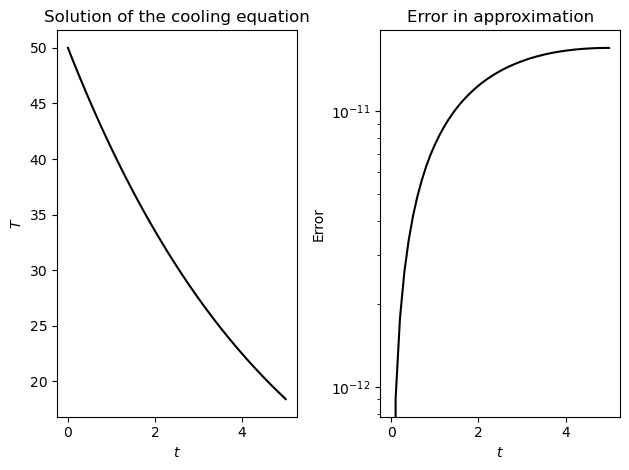

In [8]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def f(t, y):
    return -0.2*y

t_range = (0, 5)

T0 = np.array([50.])

def true_solution(t):
    return 50.*np.exp(-0.2*t)

sol = integrate.solve_ivp(f, t_range, T0, max_step=0.1)

t_vals = sol.t
T_vals = sol.y[0, :]

fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True)

ax1.plot(t_vals, T_vals, "k")
ax1.set_xlabel("$t$")
ax1.set_ylabel("$T$")
ax1.set_title("Solution of the cooling equation")


err = np.abs(T_vals - true_solution(t_vals))
ax2.semilogy(t_vals, err, "k")
ax2.set_xlabel("$t$")
ax2.set_ylabel("Error")
ax2.set_title("Error in approximation")

plt.show()


In [ ]:
def euler(func, t_range, y0, step_size):
    """Solve a differential equation using Euler's method"""
    t = [t_range[0]]
    y = [y0]
    i = 0

In [ ]:
while t[i] < t_range[1]:
    i += 1
    t.append(t[i-1] + step_size) # step t
    y.append(y[i-1] + step_size*func(t[i-1], y[i-1])) # step y
return t, y

# Solving partial differential equations

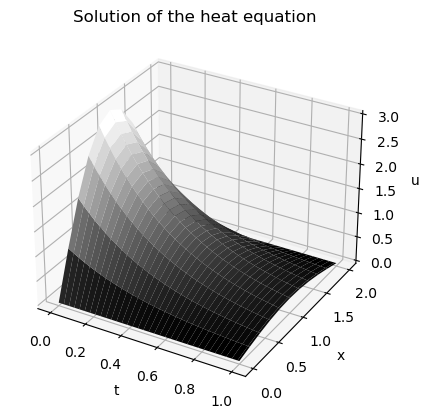

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

alpha = 1
x0 = 0 # Left hand x limit
xL = 2 # Right hand x limit

N = 10
x = np.linspace(x0, xL, N+1)
h = (xL - x0) / N

k = 0.01
steps = 100
t = np.array([i*k for i in range(steps+1)])

r = alpha*k / h**2
assert r < 0.5, f"Must have r < 0.5, currently r={r}"

from scipy import sparse
diag = [1, *(1-2*r for _ in range(N-1)), 1]
abv_diag = [0, *(r for _ in range(N-1))]
blw_diag = [*(r for _ in range(N-1)), 0]

A = sparse.diags([blw_diag, diag, abv_diag], (-1, 0, 1), shape=(N+1, N+1), dtype=np.float64, format="csr")

u = np.zeros((steps+1, N+1), dtype=np.float64)

def initial_profile(x):
    return 3*np.sin(np.pi*x/2)

u[0, :] = initial_profile(x)

for i in range(steps):
    u[i+1, :] = A @ u[i, :]


X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot_surface(T, X, u, cmap="gray")
ax.set_title("Solution of the heat equation")
ax.set_xlabel("t")
ax.set_ylabel("x")
ax.set_zlabel("u")


plt.show()
